In [1]:
import pandas as pd
import numpy
import csv
import re
import json

In [2]:
# Importing and reading the HF60 file
hf60=pd.read_csv("D:\MSC Dissertation\pdbdata\merged1.csv",delimiter=",")

In [3]:
#mapping the uniprot sequence to the peptide sequence.
startpos = []
endpos = []
x = hf60['P_Seq']
y = hf60['U_Seq']
for i in range(0, len(hf60)):
    string1 = x[i]
    string2 = y[i]
    start = re.search(string1, string2).start()
    end = re.search(string1, string2).end()
    startpos.append(start + 1)
    endpos.append(end + 1)
else:
    startpos.append(None)
    endpos.append(None)

starts = pd.DataFrame(startpos)
starts.columns = ['Start_Position']
ends = pd.DataFrame(endpos)
ends.columns = ['End_Position']

newtab = pd.concat([hf60, starts, ends], axis=1, join_axes=[hf60.index])



In [4]:
#mapping the modified residues retrieved from uniprot to the peptide sequence.
pmod = list(newtab['Mod_Positions'])
tmod = list(newtab['Mod_Types'])
startran = list(newtab['Start_Position'])
endsran = list(newtab['End_Position'])
modifiedp = []
modifiedr = []


modp=pmod
modt=tmod
modifiedp_all = []
modifiedr_all = []
modlen_all=[]
resdic=[]
count=0

for ind, (mp, mt) in enumerate(zip(modp,modt)):
    try:
        new_mp=mp[1:len(mp)-1].split(",")
        
        new_mt=mt[1:len(mt)-1].split(",")
        
        for mt in new_mt:
            if mt not in resdic:
                resdic.append(mt)
        modifiedp = []
        modifiedr = []
        
        for nwp, nwt in zip(new_mp, new_mt):
            try:
                nwp=int(nwp)
            except:
                nwp=None
      
            if(nwp!=None):
                if  startran[ind] <= nwp  <= endsran[ind]:
                    modifiedp.append(nwp)
                    modifiedr.append(nwt)
                    modlen_all.append(len(modifiedp))
                    count+=1
                    #print(startran[ind], endsran[ind],nwp, nwt)
            
        if(len(modifiedp)<1):
            modifiedp=["No_Match"]
            modifiedr=["No_Res"]
        modifiedp_all.append(modifiedp)
        modifiedr_all.append(modifiedr)
        modlen_all.append(0)
        
    except:
        
        modifiedp_all.append(['No_Match'])
        modifiedr_all.append(['No_Res'])
        modlen_all.append(0)

count2=0
for mp in modifiedp_all:
    if(mp[0]!="No_Res"):
        count2+=1
        
print len(modifiedp_all), len(modifiedr_all), len(pmod),  len(tmod), (hf60.shape), count, count2

#print count,count2


14964 14964 14964 14964 (14964, 7) 584 14964


In [5]:
#joined the data to form a data alongside the acession code of the peptides
fmoddf=pd.DataFrame(list(zip(modifiedp_all,modifiedr_all,modlen_all)),columns=["Modifications","Modified_Residue","No_of_Mods"])
Code=hf60['Code']
fmod=pd.concat([Code,fmoddf], axis=1, join_axes=[Code.index])

In [6]:
#get matches from cleaned yeast txt file and 349 peptides
#349 proteins
tfnp=pd.read_csv("D:/MSC Stats/tnfprotdat.csv",delimiter=",")

#yeast txt
yeastdb=pd.read_csv("D:/MSC Stats/YEASTDB.csv",delimiter=",")
yeastm=yeastdb.drop(['Gene designations_2','Gene designations_1','Entry','SGD','SIZE','3D'], axis=1)
yeastm.columns=(['Protein_Name','AC'])


#matched the peptide 349 to dataset
tfnpp=list(tfnp['Protein'])
tfpno=list(tfnp['Proteinname'])
tfcpca=list(tfnp['cpc abundance'])
yeastdbp=list(yeastm['Protein_Name'])
yeastac=list(yeastm['AC'])
#print tfnpp

matcnac=[]
matcp=[]

#Getting the matches
for xy,xz in zip(yeastdbp,yeastac):
    if xy in tfnpp:
        matcnac.append(xy)
        matcp.append(xz)

macnt=[]
cpcvals=[]

#getting the copy per cell abundance values associated to the peptide
for ts,tr in zip(tfnpp,tfcpca):
      if ts in matcnac:
            macnt.append(ts)
            cpcvals.append(tr)

            
ac=[]
fcpc=[]

#getting uniprot ac with cpc values
            
unipor=pd.DataFrame(matcp)
unipor.columns=(['AC'])
prema=pd.DataFrame(matcnac)
prema.columns=(['Protein_Name'])
prematches=pd.concat([prema,unipor],axis=1,join_axes=[prema.index])

protma=pd.DataFrame(macnt)
protma.columns=(['Protein_Name'])
cpcva=pd.DataFrame(cpcvals)
cpcva.columns=(['CPC_Abundance'])
ssmatchs=pd.concat([protma,cpcva],axis=1,join_axes=[protma.index])
tfg=ssmatchs[ssmatchs["Protein_Name"].isin(tfnp['Protein'])]

tfmatches=pd.concat([protma,cpcva],axis=1,join_axes=[protma.index])

abundancedat=tfmatches.merge(prematches)

print abundancedat

    Protein_Name  CPC_Abundance      AC
0        YPR145W   1.495287e+04  P49089
1        YCR012W   3.696853e+06  P00560
2        YPL212C   4.382171e+03  Q12211
3        YNL252C   2.285057e+03  P36528
4        YNL306W   3.359752e+03  P42847
5        YER021W   8.760469e+03  P40016
6        YLR222C   7.131812e+02  Q05946
7        YPL237W   9.064191e+03  P09064
8        YGR088W   2.350147e+03  P06115
9        YGR178C   9.460102e+03  P53297
10       YJR104C   1.802026e+05  P00445
11       YNL016W   5.251720e+04  P32588
12       YGR232W   9.052061e+03  P50086
13       YMR146C   1.163273e+04  P40217
14       YLR291C   3.091803e+03  P32502
15       YGR162W   7.077365e+03  P39935
16       YMR120C   5.683130e+04  P38009
17       YJL111W   2.960925e+03  P42943
18       YOL109W   1.722219e+05  Q08245
19       YOL052C   3.983930e+02  P21182
20       YLR200W   3.218956e+03  P52553
21       YOR181W   9.391139e+02  Q12446
22       YGL009C   2.225560e+03  P07264
23       YNL068C   2.503218e+03  P41813


In [7]:
#calcuting intensity from supplementary data 4 from the paper.
sthf60=pd.read_csv("D:/MSC Stats/StatHF60.csv",delimiter=",")
#Removed protein with 2 leading proteins
filtered=sthf60.loc[sthf60['Proteins'].str.contains(';')==False]
filtered['Sum_of_Intensity']=filtered['Intensity D1_PYGM_500ng25fmol_1h']+filtered['Intensity D2_PYGM_500ng25fmol_1h']+filtered['Intensity D3_PYGM_500ng25fmol_1h']+filtered['Intensity D4_PYGM_500ng25fmol_1h']
#drop everything except acession code and sum of intensity
filtered=filtered.drop(['Intensity','Leading razor protein','Intensity D1_PYGM_500ng25fmol_1h','Intensity D2_PYGM_500ng25fmol_1h','Intensity D3_PYGM_500ng25fmol_1h','Intensity D4_PYGM_500ng25fmol_1h'], axis=1)


filpro=list(filtered['Proteins'])
sumoi=list(filtered['Sum_of_Intensity'])

#Matches filtered sum of intensity and mod res accession  code
aac=list(abundancedat['AC'])
acpa=list(abundancedat['CPC_Abundance'])
code=list(hf60['Code'])

maac=[]
macpa=[]
for i in  range(0,len(filtered)):
    try:
        maac.append(aac[i])
        macpa.append(acpa[i])
    except:
        maac.append('No_AC')
        macpa.append('No_CPC')

#Joined the sum of intesity with the previously retrieved information

fmodded=pd.concat([filtered,fmod], axis=1, join_axes=[filtered.index])


C:\Users\Bryan\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
#finding peptides that the f-factor can be calulate 
mamc=[]
macmpa=[]
for xc,xm in zip(filpro,sumoi):
    if xc in maac:
        mamc.append(xc)
        macmpa.append(xm)
    else:
        mamc.append('No_ac')
        macmpa.append('No_Cpc')


filprom=pd.DataFrame(mamc)
filprom.columns=(['AC'])
somim=pd.DataFrame(macmpa)
somim.columns=(['SOMI'])

dftab=pd.concat([filprom,somim], axis=1, join_axes=[filprom.index])

fmacpa=pd.DataFrame(macpa)
fmacpa.columns=(['CPC_Abundance'])
fmaac=pd.DataFrame(maac)
fmaac.columns=(['AC'])

gtab=pd.concat([fmaac,fmacpa], axis=1, join_axes=[fmaac.index])

afr=dftab[dftab['AC'].isin(gtab['AC'])]

#Getting the peptides with f factor from the HF60
mffch=afr.merge(gtab,how='left') #2932 matches
mffch.columns=(['Code','SOMI','CPC_Abundance'])
fsdf=mffch['SOMI']/mffch['CPC_Abundance']
ffac=pd.DataFrame(fsdf,columns=['F-Factor'])

ffactor=pd.concat([mffch,ffac], axis=1, join_axes=[mffch.index])
#Sorting the data by their  ffactor values
print ffactor.sort_values('F-Factor',ascending=True)

        Code         SOMI CPC_Abundance     F-Factor
1112  P38323            0       1070.18            0
2203  P32477            0       2406.99            0
2001  P20449            0       10725.9            0
1566  P53550            0       1909.98            0
1585  P38688            0       2222.75            0
34    P22203            0       64542.9            0
1228  P52489            0       3821.34            0
2162  Q12109            0       6603.89            0
2508  P25373            0       20016.1            0
308   P38069            0       16155.6            0
1627  P38323            0       1070.18            0
2293  Q05022            0       1699.54            0
2489  P49089            0       14952.9            0
633   P48363            0       4602.37            0
1642  P27616            0       8313.23            0
2180  Q07825            0       4719.42            0
45    Q03533            0       1959.27            0
359   P38715            0       15641.6       

In [9]:
#Separating the flyers into the classes(Weak,Neutral,Strong)
qew=ffactor.sort_values('F-Factor')
tye=list(qew['F-Factor'])
tte=list(qew['Code'])
sortfy=[]
sortcy=[]
flyerty=[]

for xt,yt in zip(tye,tte):
   #Weak flyer peptides
    if xt in tye[0:586]:
        flyerty.append('Weak')
        sortfy.append(xt)
        sortcy.append(yt)
     #Strong flyer peptides
    if xt in tye[2345:2932]:
        flyerty.append('Strong')
        sortfy.append(xt)
        sortcy.append(yt)
    else:
        #Neutral flyer peptides
        if xt in tye[586:2345]:
            flyerty.append('Neutral')
            sortfy.append(xt)
            sortcy.append(yt)
            
            
flyeds=pd.DataFrame(flyerty)
flyeds.columns=(['Flyer_Type'])
stts=pd.DataFrame(sortfy)
stts.columns=(['F-Factor'])
cdc=pd.DataFrame(sortcy)
cdc.columns=(['Code1'])

#Combine them all in the dataframe
flyte=pd.concat([flyeds,stts,cdc], axis=1, join_axes=[flyeds.index])



In [26]:
#FLYERS
#2932 in total
allmatches=fmod[fmod['Code'].isin(ffactor['Code'])]
mallmatches=allmatches[allmatches['No_of_Mods'] !=0]#121 modified with f-factor
nmallmatches=allmatches[allmatches['No_of_Mods'] ==0] #2811 #no mod residue with f-factor
allmatches.to_csv('Flyers')

In [12]:
sfly=flyte.sort_values('Code1')
sflylist=allmatches.sort_values('Code')
modtypefly=pd.concat([sfly.reset_index(),sflylist.reset_index()], axis=1)

modtypefly1=modtypefly.drop(columns=['index', 'Code1'])

weakflyer=modtypefly1[modtypefly1['Flyer_Type']=='Weak']
neutflyer=modtypefly1[modtypefly1['Flyer_Type']=='Neutral']
strongflyer=modtypefly1[modtypefly1['Flyer_Type']=='Strong']

weakflyers=weakflyer.sort_values('F-Factor')
neutflyers=neutflyer.sort_values('F-Factor')
strongflyers=strongflyer.sort_values('F-Factor')

weakres=list(weakflyers['Modified_Residue'])
neures=list(neutflyers['Modified_Residue'])
strres=list(strongflyers['Modified_Residue'])

nra=[]
rsa=[]
for xa in weakres:
    if xa==['No_Res']:
        nra.append(xa)
    else:
        rsa.append(xa)
        
nrb=[]
rsb=[]      
for xb in neures:
    if xb==['No_Res']:
        nrb.append(xb)
    else:
        rsb.append(xb)
nrc=[]
rsc=[]       
for xc in strres:
    if xc==['No_Res']:
        nrc.append(xc)
    else:
        rsc.append(xc)

print 'Non Modified Residues','Weak:',len(nra),'Neutral:',len(nrb),'Strong:',len(nrc)
print 'Modified Residues','Weak:', len(rsa),'Neutral:',len(rsb),'Strong:',len(rsc)

Non Modified Residues Weak: 565 Neutral: 1714 Strong: 567
Modified Residues Weak: 21 Neutral: 45 Strong: 20


# Non Flyers

In [13]:
#Insilico digestion of 349 proteins
digest=pd.read_csv("D:/MSC Stats/ms_d.csv",delimiter=",")
nonmod=digest[digest['Modifications']=='None']

In [14]:
nonmod=nonmod.sort_values('Sequence', ascending=True)
nonmod=nonmod.drop_duplicates(subset='Sequence', keep='first')
nonmod

,Number,m/z (mi),m/z (av),Charge,Modifications,Start AA,End AA,Missed Cleavages,Previous AA,Sequence,Next AA
9940,229,560.3039,560.6313,1,None,121,126,0,R,AAAAEK,N
5094,117,656.3726,656.7641,1,None,526,532,0,K,AAAAQPK,G
1045,25,2697.3995,2699.0575,1,None,210,235,0,R,AAAHEHYFLSVTKPGVTAIVGTEGNK,D
6619,152,784.4312,784.8957,1,None,143,150,0,R,AAAHSSLK,E
10902,250,1759.9476,1761.0376,1,None,578,594,0,R,AAAPTVVFLDELDSIAK,A
5080,116,1246.6525,1247.3961,1,None,208,219,0,K,AAASTLEDIEVK,D
12381,289,1771.9524,1773.1203,1,None,342,357,0,R,AACHFLQETGLLSIIR,A
9949,229,814.5033,815.0064,1,None,339,346,0,K,AADALLLK,V
15177,349,822.3992,822.8983,1,None,531,538,0,K,AADEAFAK,K
12077,281,2508.0717,2509.4877,1,None,26,52,0,K,AAEAGETGAATSATEGDNNNNTAAGDK,K


In [15]:
#Removing flyers from non flyer set
Code=hf60['Code']
p_seq=hf60['P_Seq']
fmods=pd.concat([Code,p_seq,fmoddf], axis=1, join_axes=[Code.index])
sdv=nonmod[nonmod['Sequence'].isin(fmods['P_Seq'])]
drt=fmods[fmods['P_Seq'].isin(nonmod['Sequence'])]
print display(drt)

,Code,P_Seq,Modifications,Modified_Residue,No_of_Mods
8,P25694,AAAPTVVFLDELDSIAK,[No_Match],[No_Res],0
17,Q07478,AAEAGETGAATSATEGDNNNNTAAGDK,[No_Match],[No_Res],0
20,P07245,AAEEAGIVANFIHLDESATEFEVLR,[No_Match],[No_Res],0
22,P16862,AAEENFNADDK,[No_Match],[No_Res],0
24,P38431,AAELDVLNDPK,[No_Match],[No_Res],0
28,P38011,AAEPHAVSLAWSADGQTLFAGYTDNVIR,[No_Match],[No_Res],0
33,P07149,AAFEDLK,[No_Match],[No_Res],0
42,P00560,AAGFLLEK,[No_Match],[No_Res],0
49,P16862,AAIDFYTK,[No_Match],[No_Res],0
53,P17106,AAILACAAEYIQK,[No_Match],[No_Res],0


None


In [16]:
tx=list(fmods['P_Seq'])
tc=list(fmods['Code'])
ty=list(nonmod['Sequence'])
resqw = [ele in ty for ele in tx]
rewd=pd.DataFrame(resqw)
rewd.columns=(['Partial_or_full'])

In [25]:
#NONFLYERS
partial=pd.concat([fmods,rewd], axis=1, join_axes=[fmods.index])
nonflys=partial[partial['Partial_or_full']==False]
finnonfly=nonflys[~nonflys['Code'].isin(allmatches['Code'])]


nonflyers=list(finnonfly['Modified_Residue'])
nrs=[]
rsn=[]      
for nx in nonflyers:
    if nx==['No_Res']:
        nrs.append(nx)
    else:
        rsn.append(nx)
        
print finnonfly       #
print 'Non Modified Residues:', len(nrs), 'Modified Residues:',len(rsn)
finnonfly.to_csv('Nonflyers')

         Code                            P_Seq Modifications  \
0      P38915               AAAAGAGGAGDSGDAVTK         [108]   
1      P09938                     AAADALSDLEIK    [No_Match]   
2      P15180            AAAEGVANLHLDEATGEMVSK    [No_Match]   
3      P27472        AAAHSADVFTTVSQITAFEAEHLLK    [No_Match]   
4      P23337        AAAHTADVFTTVSQITALEAEHLLK    [No_Match]   
5      P05030                          AAALVNK    [No_Match]   
6      Q04697            AAAPGIQLVAGEGFQSPLEDR    [No_Match]   
7      P09457                         AAAPPPVR    [No_Match]   
9      P27692                      AAAQDGYVPQR    [No_Match]   
10     P32790                      AAASTPEPNLK    [No_Match]   
11     P16521                        AAATAAMTK    [No_Match]   
12     P33892              AACLVQNGIATWFPLAVTK    [No_Match]   
13     P32263                    AADETAAAFYPSK    [No_Match]   
14     P07342                        AADLINLAK    [No_Match]   
15     P04161                        AAD

In [18]:
import itertools as it

from collections import Counter

flyms=[['Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine'],['Asymmetricdimethylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['N6-(pyridoxalphosphate)lysine'],['Phosphothreonine'],['Phosphotyrosine'],['Phosphoserine'],['Phosphothreonine','Phosphoserine'],['Phosphoserine','Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphothreonine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['N6-(pyridoxalphosphate)lysine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphothreonine'],['N-acetylserine'],['Phosphothreonine'],['N-acetylalanine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine','Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['O-(pantetheine4\'-phosphoryl)serine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['N6-lipoyllysine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphothreonine'],['Phosphoserine'],['N-acetylserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphotyrosine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphothreonine','Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine']]
nonms=[['Phosphoserine'],['N-acetylalanine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine','Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Phosphoserine'],['O-(pantetheine4\'-phosphoryl)serine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine','Phosphoserine','Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphotyrosine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','ADP-ribosylglycine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['N6'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Omega-N-methylarginine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['N-acetylalanine'],['Phosphothreonine'],['N6-(pyridoxalphosphate)lysine'],['Phosphoserine'],['None','None','None','None','N6','None'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphothreonine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine','Phosphothreonine'],['N6-trimethyllysine'],['Phosphoserine'],['Phosphothreonine','Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine','Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Dimethylatedarginine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphotyrosine'],['Phosphoserine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['N6-acetyllysine','N6-acetyllysine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphotyrosine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine','Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['N-acetylserine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine'],['N-acetylmethionine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine'],['N6-acetyllysine','N6-butyryllysine','N6-acetyllysine','N6-butyryllysine','N6-methyllysine','N6-acetyllysine','N6-butyryllysine','N6-methyllysine','N6-propionyllysine','N6','N6-trimethyllysine','N6'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['N6','N6-trimethyllysine','N6','None','None','None','None','N6-methyllysine','Phosphoserine','N6-dimethyllysine'],['N-acetylserine'],['Phosphoserine'],['N-acetylserine'],['N6'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Methionine(R)-sulfoxide','Methionine(R)-sulfoxide'],['Asymmetricdimethylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine'],['Phosphoserine'],['Phosphothreonine'],['N6-lipoyllysine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylalanine'],['Phosphoserine'],['N-acetylserine'],['Phosphothreonine'],['Phosphoserine'],['N-acetylalanine'],['N-acetylserine'],['N-acetylserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['N-acetylserine'],['Phosphoserine'],['N-acetylserine'],['N-acetylcysteine','N-acetylaspartate'],['N-acetylthreonine'],['Phosphoserine'],['Phosphothreonine','Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Omega-N-methylarginine','Asymmetricdimethylarginine'],['N-acetylserine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['N6-methyllysine','Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Omega-N-methylarginine','Symmetricdimethylarginine'],['N-acetylserine','Phosphoserine'],['N-acetylserine'],['N-acetylserine'],['N-acetylserine','Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['N-acetylalanine'],['Phosphoserine'],['Phosphoserine'],['ADP-ribosylarginine'],['Phosphoserine','Phosphoserine'],['Phosphothreonine'],['Phosphoserine','Phosphoserine'],['Asymmetricdimethylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine'],['N-acetylalanine'],['Phosphothreonine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphotyrosine','Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphothreonine'],['Phosphothreonine','Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine','Phosphoserine'],['Phosphoserine'],['Asymmetricdimethylarginine','Omega-N-methylarginine'],['Phosphoserine','Phosphoserine','Phosphoserine'],['Asymmetricdimethylarginine','Asymmetricdimethylarginine','Omega-N-methylarginine','Omega-N-methylarginine'],['Phosphoserine'],['N-acetylthreonine'],['Phosphothreonine','Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['N6-trimethyllysine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['N6-(pyridoxalphosphate)lysine'],['N-acetylserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine','Phosphoserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['N-acetylserine','Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphothreonine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['Phosphoserine'],['None'],['None'],['Phosphothreonine'],['Phosphoserine']]


flymsc=Counter(it.chain(*map(set, flyms)))
nonmsc=Counter(it.chain(*map(set, nonms)))
tey=pd.DataFrame.from_dict(nonmsc, orient='index')
toy=pd.DataFrame.from_dict(flymsc, orient='index')
#print tey.sort_index()#nonflyers
#print toy.sort_index()#flyer

#print flyms
print "Total number of modified residues for Flyers:",sum(flymsc.itervalues())
print "Total number of Non modified residues for Flyers:",len(modtypefly1)-sum(flymsc.itervalues())
print "Total number of modified residues for Non Flyers:", sum(nonmsc.itervalues())
print "Total number of Non modified residues for Non Flyers:",len(nonflyers)-sum(nonmsc.itervalues())

Total number of modified residues for Flyers: 98
Total number of Non modified residues for Flyers: 2834
Total number of modified residues for Non Flyers: 380
Total number of Non modified residues for Non Flyers: 11427


In [19]:
yeast=list(fmods['Modified_Residue'])
nry=[]
rsy=[]      
for xy in yeast:
    if xy==['No_Res']:
        nry.append(xy)
    else:
        rsy.append(xy)
       
    
print 'Non Modified Residues:',len(nry), 'Modified Residues:',len(rsy)

Non Modified Residues: 14544 Modified Residues: 420


In [20]:
nonfls1=pd.read_csv("D:/MSC Stats/nonflyres_count.csv",delimiter=",")
fls1=pd.read_csv("D:/MSC Stats/flyres_count.csv",delimiter=",")
#nonfls=nonfls.sort_values(by='No_of_Residues')
#fls=fls.sort_values(by='No_of_Residues')

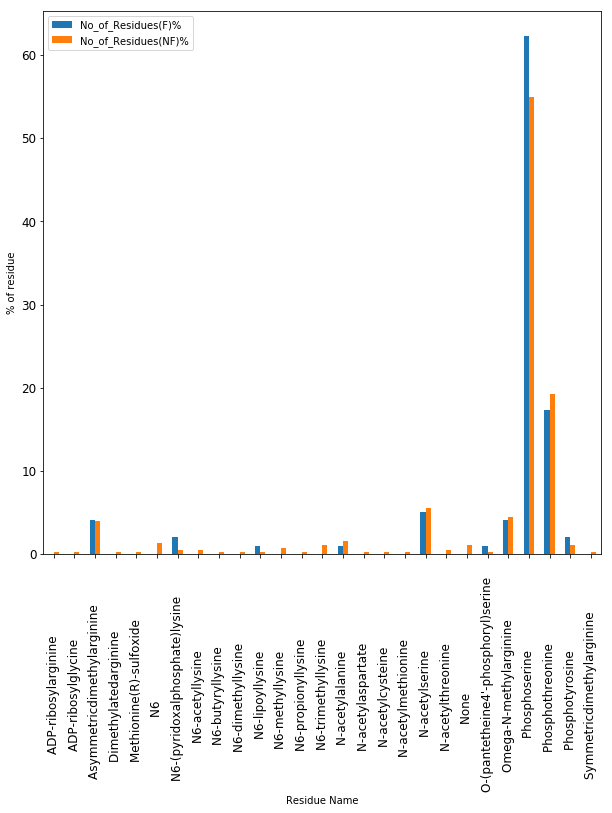

In [21]:
import numpy as np
import matplotlib.pyplot as plt

trests=pd.read_csv("D:/MSC Stats/combinedflyersandnon.csv",delimiter=",")

xte=trests.plot(kind='bar',x='Residues_Name', figsize=(10, 10), legend=True, fontsize=12)
plt.xlabel('Residue Name', fontsize=10)
plt.ylabel('% of residue', fontsize=10)
plt.savefig('Fig1_resbreakdown', bbox_inches = 'tight')
plt.show()

In [22]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import expected_freq
obs=np.array([[86,2846],[333,11474]])

chi2_contingency(obs)

(0.07120030068568436,
 0.7895970944018313,
 1L,
 array([[   83.35083791,  2848.64916209],
        [  335.64916209, 11471.35083791]]))